<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Deep_Residual_Learning_for_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Residual Learning for Image Recognition**

논문 링크: https://arxiv.org/abs/1512.03385

ResNet은 microsoft에서 개발한 모델이며, 2016년도에 CVPR에서 발표된 논문이다. 또한 ResNet은 **2015년에 개최된 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 우승**을 차지한 신경망(CNN)구조이다. 또한, 이 모델은 성는만 좋은 것이 아닌 매우 간단한데, 2014년에 개최된 ILSVRC에서 우승한 **GoogLeNet**과 비교하면 얼마나 쉬운지 체감이 된다.

GoogLeNet이 22층인 것에 비해 ResNet은 152층의 네트워크로 **약 7배나 깊어졌다.**

***Is learning better networks as easy as stacking more layers?***
(그러면 과연 층이 깊을수록 모델 학습이 잘 될까?)

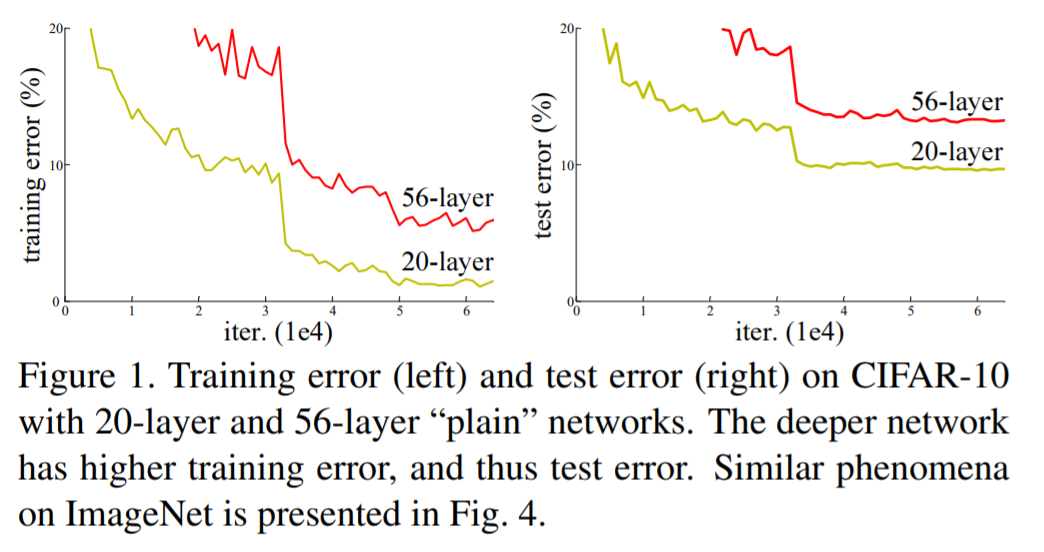

정답은 "No"이다. 위의 그림의 **plain networks**는 VGGNet을 참고하여 Convolution layer와 fully-connected layer을 쌓아 ResNet 연구팀이 임의로 만든 네트워크이다. 이 그림에서 중요한 점은 레이어를 깊이 쌓았을 때의 문제점이 단순 Overfitting이 아닌, **층이 깊어지면, Test에서의 정확도만 줄어드는 것이 아니라, Train에서도 낮은 층보다 정확도가 낮은 것을 확인할 수 있다.**

이는 **gradient vanishing/exploding** 문제 때문에 학습이 잘 이루어지지 않기 때문이다.

gradient vanishing이란 layer가 깊어질수록 미분이 점점 많이 하기 때문에 **backprogation을 해도 앞의 layer일수록 미분값이 작아지기 때문에 output에 영향을 끼치는 weight 정도가 작아지는 것**을 뜻한다.

이는 **Overfitting**과는 다른 문제인데, 위에서 그림과 같이 설명한 것처럼, Test 성능에서만 안좋은 결과를 보인 것이 아니라 **Degradation** 문제로 Train 성능에서도 잘 학습이 안됬기 때문이다.

이러한 문제를 해결하기 위하여 ResNet 연구팀은 **residual learning**이라는 새로운 아이디어를 제안하였다.

## **ResNet 구조**

기존의 neural network의 학습 목적은 input(x)를 target(y)로 mapping하는 함수 H(x)를 찾는 것이었다.

따라서 H(x)-y를 최소화하는 방향으로 학습을 진행한다.

예시를 들면, 강아지와 고양이를 image classification하는 경우, x에 대한 target(y)는 사실 x를 대변하는 것이므로 y와 x의 의미가 같게끔 mapping해야한다. 즉, 강아지의 사진이 pixel값이 input(x)로 주어질때 이를 2개의 label중 강아지가 1에 해당하면 target(y)를 1로 정해서 학습하는 것이 아닌, 강아지 사진의 pixel값 (x)로 y를 mapping해야한다. 따라서 **network의 출력값이 x가 되도록 H(x)-x를 최소화하는 방향으로 학습**을 진행한다.

**F(x) = H(x) - x를 잔차(residual)**라 하며, 이 잔차를 학습하는 것을 **Residual Learning**이라 한다.

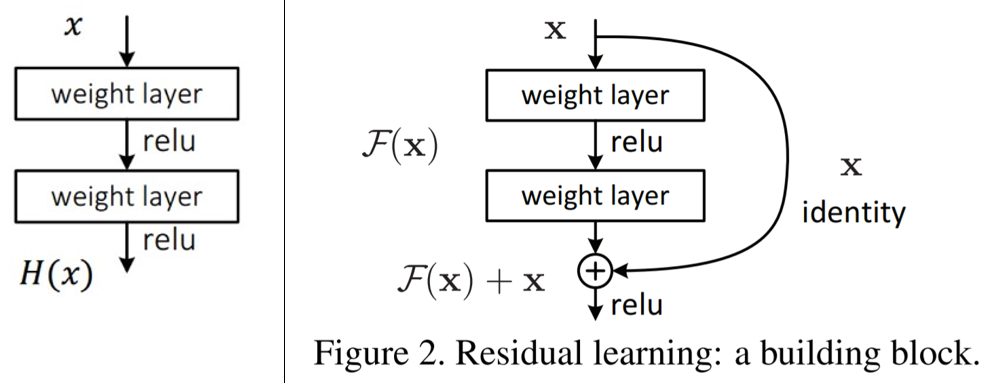

위의 그림에서 왼쪽과 같이 network output이 x가 되도록 mapping하는 것이 아닌, 오른쪽과 같이 마지막에 x를 더하여 네트워크의 output은 0이 되도록 mapping해서 최종 output이 x가 되도록 학습한다.

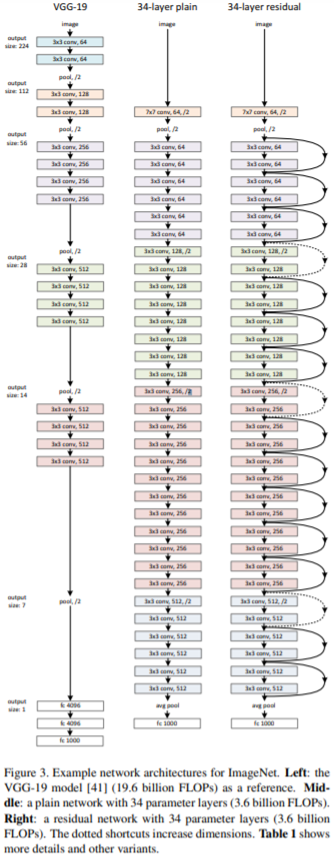

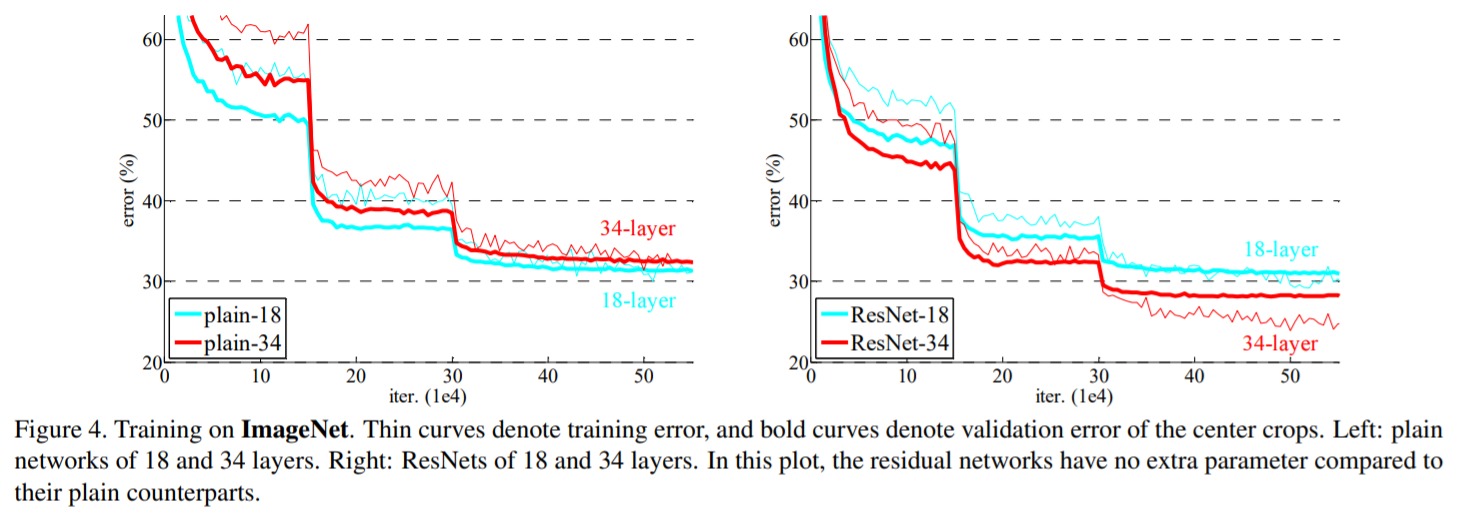